# 7.2. Simulación para medición de riesgos (VaR).

- Utilizando la serie de precios del SP500 del último año, ticker SPY en IEX, calcula:
    - Un gráfico con el drawdown.
    - Pinta la distibución de los retornos usando la función distplot, de seaborn.
    - Value at Risk (VaR), con un nivel de cofianza del .05. Tip: usa la función quantile sobre los retornos.
    - Expected Shortfall (ES). Tip: usa la anterior función y encuentra los retornos que están por debajo.
- Nota
 - Value at Risk:  Se define como un valor límite tal que la probabilidad de que una pérdida a precios de mercados en la cartera sobre un el horizonte temporal dado, exceda ese valor (asumiendo mercados normales y que no se produce negociación en la cartera) sea el nivel de probabilidad dado.
 - Expected Shortfall: Media de los retornos que están por debajo del VaR.

<center>
<img src="../module_7/imgs/var_es.png"  alt="drawing" width="500"/>
</center>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import utils

In [3]:
close_spy = utils.get_data_iex('SPY', st_range='5y')

In [4]:
close_spy.head()

date
2015-06-08    208.48
2015-06-09    208.45
2015-06-10    210.95
2015-06-11    211.63
2015-06-12    210.01
Name: SPY, dtype: float64

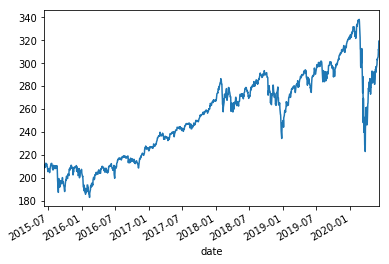

In [5]:
close_spy.plot()

### Drawdown

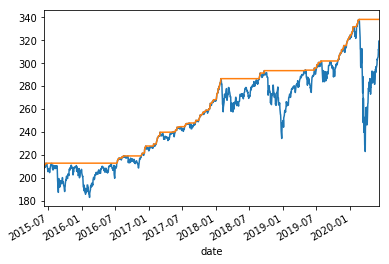

In [6]:
close_spy.plot()
close_spy.expanding().max().plot()

In [7]:
draw_down = (close_spy/close_spy.expanding().max()) - 1

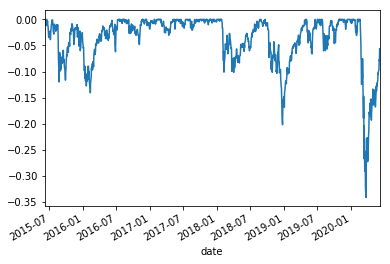

In [8]:
draw_down.plot()

### Distplot

In [9]:
import seaborn as sns

In [10]:
retornos = np.log(close_spy).diff().dropna()

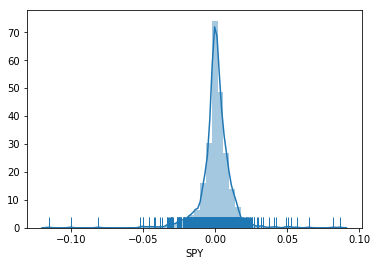

In [11]:
fig, ax = plt.subplots()
sns.distplot(retornos, rug=True, ax=ax)

### Value at Risk (VaR) and Expected Shortfall (ES)

In [12]:
var = retornos.quantile(q=0.05)
shortfall = retornos[retornos < var].mean()

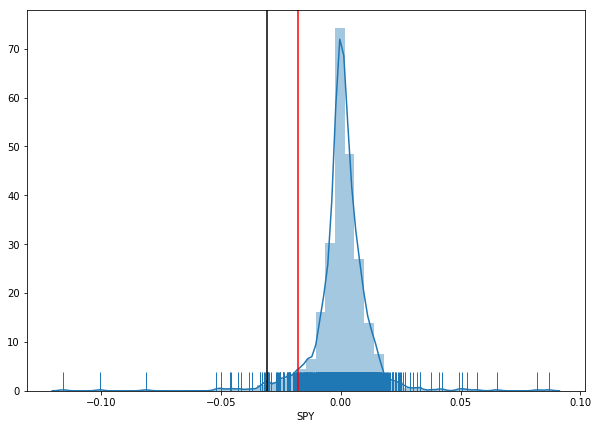

In [13]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.distplot(retornos, rug=True, ax=ax)
ax.axvline(var, color='r')
ax.axvline(shortfall, color='k')